# DIABLO Project

In [1]:
#from IPython.display import Image
#Image(r"C:\Users\s.aumon\PycharmProjects\Diablo\pic\Diablo.png")

## Path of the package

In [2]:
import sys, os
sys.path.append("/Users/picklepum/Documents/GitHub/Diablo_2/")
from beam import beam
import madx_utils.madx_utils as mxu
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-dark'])
plt.suptitle('figure title', color='w')

Text(0.5,0.98,'figure title')

<Figure size 432x288 with 0 Axes>

## Initialize the Beam object

### two type of initialization

- with the type of particle
- without speciafying the particle type

In [3]:
# initialization with the type of particle - the type of particle is optional, by default the type is a PROTON

beam_test = beam.Beam(type_particle="PROTON")

In [4]:
# Example without speciafying that the particle is a proton

beam_test_default = beam.Beam()

## Import the STANDARD beam distribution

Import a beam distribution with the standard format:
- the harder should be #    X(mm)         XP(mrad)        Y(mm)         YP(mrad)        Z(mm)         W(MeV)
- the units are in mm, mrad, MeV


At that point, two possibilities:
- the file exists
- the files does not exist

The file exists and with the good format: The distribution is loaded correctly

In [5]:
beam_test.read_distribution('Standard_distribution/CCL_Output_99.0.dat')

Yop


'The beam distribution has been loaded successfully , You should check the distribution is correctly formatted into the dataframe - type thenameofyourobject.distribution'

The file does not exist: The distribution is not loaded correctly, the error meassage is printed

In [6]:
beam_test_default.read_distribution('CCL_Output_99.0.dat')

Ooops, the file is not found ¯\_(ツ)_/¯
Yop


### Display the distribution as a dataframe

In [9]:
beam_test.distribution[:5]

,X(mm),XP(mrad),Y(mm),YP(mrad),Z(mm),W(MeV)
0,-0.013987,-0.507061,0.591221,0.570521,-26.41257,98.34275
1,-0.076495,0.604121,0.374664,0.449614,62.97143,100.60880
2,0.120022,-1.843409,0.271826,0.270927,-71.10706,97.24772
3,-0.446440,0.198818,0.212682,0.279562,31.49537,99.79799
4,0.173062,0.020461,-0.967764,-0.511022,71.82682,100.83660


### Standard to TRAVEL

In [6]:
beam_test._e_total_av

1037.4687790439543

In [10]:
beam_test.standard2travel("travel.dat", phi_ref_rad = 0, rf_frequency=3.0e9)

## Plot the distributions

In [11]:
#plm.hist(beam_test.y, "X(mm)", "# Occurence", "Y")
#plm.hist(beam_test.x, "X(mm)", "# Occurence", "X")

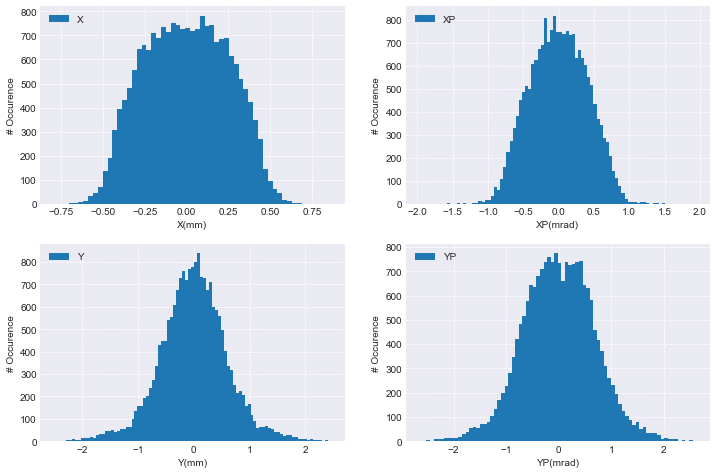

In [12]:
beam_test.phase_space_hist((12,8))

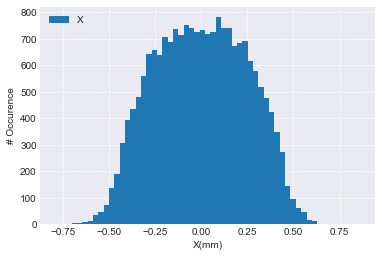

In [13]:
beam_test.hist(beam_test.x, "X(mm)", "# Occurence", "X")

## Emittance

Compute the emittance from distribution

In [11]:
beam_test.emittance_calculation()

In the previous method, twiss parameters were also computed

In [12]:
print("Betx = " + str(beam_test.bx) + "m",  ", Bety = " + str(beam_test.by) + "m")
print("Alfx = " + str(beam_test.ax) ,  ", Alfy = " + str(beam_test.ay) )
print("Gamma_x = " + str(beam_test.gx) ,  ", Gamma_y = " + str(beam_test.gy) )
print("ex = " + str(beam_test.e_x) +" mm.mrad" ,  ", ey = " + str(beam_test.e_y) +" mm.mrad" )

Betx = 1.0029649567757217m , Bety = 4.430467054177802m
Alfx = 1.2960277441192516 , Alfy = -4.923441076856339
Gamma_x = 2.671766242104165 , Gamma_y = 5.696977706554765
ex = 0.06228325100836931 mm.mrad , ey = 0.08238682413940983 mm.mrad


The method emittance_ellipse() compute the coordinates of the RMS emittance ellipse

- this could be in a method as well

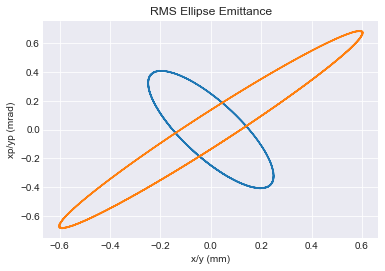

In [13]:
beam_test.emittance_ellipse()
plt.plot(beam_test.xell,beam_test.xpell, label="X")
plt.plot(beam_test.yell,beam_test.ypell, label="Y")
plt.grid()
plt.xlabel("x/y (mm)")
plt.ylabel("xp/yp (mrad)")
plt.title("RMS Ellipse Emittance");

## Typical working loop for me

- Import beam distribution from Veliko (Standard format)

In [3]:
bm = beam.Beam()
bm.read_distribution('Standard_distribution/CCL_Output_99.0.dat')

Yop


'The beam distribution has been loaded successfully , You should check the distribution is correctly formatted into the dataframe - type thenameofyourobject.distribution'

In [4]:
bm.distribution[:10]

,X(mm),XP(mrad),Y(mm),YP(mrad),Z(mm),W(MeV)
0,-0.013987,-0.507061,0.591221,0.570521,-26.412570,98.34275
1,-0.076495,0.604121,0.374664,0.449614,62.971430,100.60880
2,0.120022,-1.843409,0.271826,0.270927,-71.107060,97.24772
3,-0.446440,0.198818,0.212682,0.279562,31.495370,99.79799
4,0.173062,0.020461,-0.967764,-0.511022,71.826820,100.83660
5,0.384915,-0.284346,-0.202174,-0.147238,-76.230940,97.12464
6,0.144913,0.407902,-0.426280,-0.520321,-45.540410,97.87105
7,-0.178529,0.354457,0.999733,1.145273,4.749856,99.12066
8,0.053359,-0.718086,0.939317,1.120032,-7.014889,98.82597
9,-0.340739,0.597139,-0.428944,-0.811466,-60.633070,97.50130


- Convert it into MADX-PTC input

In [5]:
# Method that converts a stanard method to ptc distribution

bm.standard2ptc(n=bm.n_particle)

'Translated'

In [7]:
bm.ptc_input_distribution_cut[:5]

,index,X,XP,Y,YP,T,PT
0,9901,-0.000038,-0.000925,-0.000862,-0.001132,0.091334,-0.002630
1,1268,0.000064,-0.000024,0.000163,0.000107,0.016105,-0.000833
2,16609,0.000132,-0.000611,-0.000076,-0.000114,-0.181478,0.004034
3,2536,-0.000279,0.000474,0.000179,0.000386,0.181308,-0.004744
4,3884,0.000384,-0.000411,0.000094,-0.000062,0.104723,-0.002948


In [8]:
bm.write_distribution("distribution_ptc")

print_coord acquired
